In [10]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

In [11]:
data = pandas.read_csv('metrics_compare.csv')

#Sucess rate
threshold = 0.85
data['success'] = data['similarity'] < threshold
# Remove audio_path
data.drop('audio_path', axis=1, inplace=True)
data.groupby('attack_type').mean()

#Normalize the data (audio_distance and similarity)
data['Audio Dissimilarity'] = data['audio_distance'] / data['audio_distance'].max()
data['Transcription Similarity'] = data['similarity']

data.drop("similarity", axis=1,inplace=True) 
data.drop("audio_distance", axis=1,inplace=True) 

# Rename sucess to Sucess
data["Success"] = data["success"]
data.drop("success", axis=1,inplace=True) 

In [12]:
data = data.melt(id_vars=['attack_type'], value_vars=['Transcription Similarity', 'Audio Dissimilarity', 'Success'])


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'stft'),
  Text(1, 0, 'mel'),
  Text(2, 0, 'dol'),
  Text(3, 0, 'random_noise'),
  Text(4, 0, 'fft_noise'),
  Text(5, 0, 'mel_noise'),
  Text(6, 0, 'low_and_high_pass'),
  Text(7, 0, 'fir_filter'),
  Text(8, 0, 'empty')])

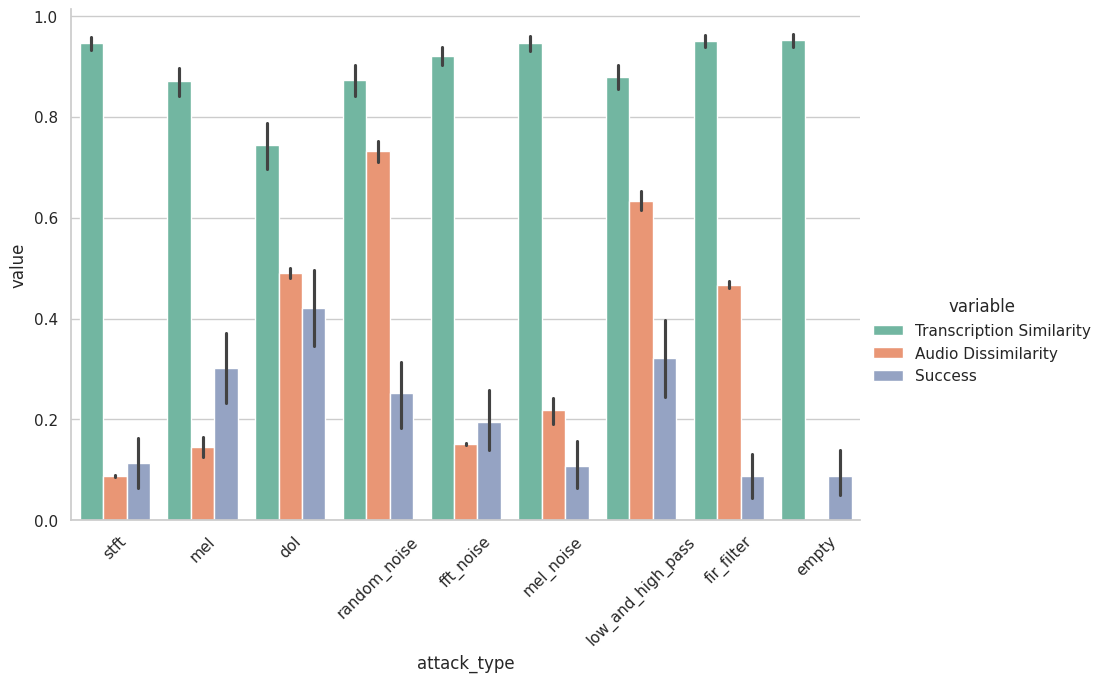

In [14]:
seaborn.set(style='whitegrid')
seaborn.catplot(x='attack_type', 
                y='value', 
                hue='variable', 
                data=data, 
                kind='bar', 
                height=6, 
                aspect=1.5,
                palette="Set2")

# Rotate the x-axis labels
plt.xticks(rotation=45)
